<a href="https://colab.research.google.com/github/diancastroherrera-dot/Red-convolucional-/blob/main/Redes_Neuronales_Convolucionales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



*   Sillero Colin Alejandra Yazmin
*   Castro Herrera Diana



Redes Neuronales Convolucionales (CNN)
Tema: Implementación de una CNN para clasificación de imágenes.
Base de Datos: CIFAR-10 (Imágenes a color de 10 clases: aviones, automóviles, aves, gatos, ciervos, perros, ranas, caballos, barcos y camiones).

Introducción

Una CNN es una red neuronal diseñada para procesar imágenes y reconocer patrones.
Es muy eficaz en tareas de visión por computadora, como clasificación de imágenes.
Las capas convolucionales detectan características como bordes, texturas y formas, permitiendo clasificar las 10 clases de CIFAR-10.

Paso 1: Importar las Librerías

Importamos las librerías necesarias para trabajar con CIFAR-10:

TensorFlow y Keras: Para construir y entrenar la CNN.

datasets: Para cargar la base de datos CIFAR-10.

layers y models: Para definir la arquitectura de la red.

Matplotlib y NumPy: Para visualizar imágenes y manejar datos.

sklearn.metrics: Para crear la matriz de confusión y obtener métricas de evaluación.

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

print("Librerías importadas con éxito.")

Librerías importadas con éxito.


Paso 2: Cargar la Base de Datos (CIFAR-10)

Para este ejemplo, usamos CIFAR-10, una base de datos estándar en visión por computadora.

Contiene 60,000 imágenes de entrenamiento y 10,000 de prueba.

Son imágenes a color de 32x32 píxeles en 3 canales (RGB).

El objetivo es clasificar cada imagen en una de 10 clases: avión, automóvil, pájaro, gato, ciervo, perro, rana, caballo, barco o camión.

Keras nos permite cargarla fácilmente con una sola línea de código:

In [ ]:
# Cargar dataset CIFAR-10
from tensorflow.keras import datasets

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

print(f"Imágenes de entrenamiento: {train_images.shape}")
print(f"Imágenes de prueba: {test_images.shape}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
Imágenes de entrenamiento: (50000, 32, 32, 3)
Imágenes de prueba: (10000, 32, 32, 3)


Paso 3: Pre-procesamiento de los Datos

Las redes neuronales necesitan los datos en un formato específico para aprender correctamente:

Normalización: Los valores de los píxeles en CIFAR-10 van de 0 a 255. Es recomendable normalizarlos a un rango de 0 a 1 dividiendo entre 255, lo que ayuda a que la red aprenda más rápido y de manera estable.

Verificación de la forma: CIFAR-10 ya tiene 3 canales de color (RGB), por lo que no necesitamos añadir dimensiones adicionales, pero siempre es útil revisar la forma de los datos antes y después del pre-procesamiento.

In [ ]:
# 1. Verificar la forma original
print(f"Forma original de las imágenes de entrenamiento: {train_images.shape}")
print(f"Forma original de las imágenes de prueba: {test_images.shape}")

# 2. Normalizar valores de píxeles a rango [0,1]
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# 3. Confirmar resultados
print(f"Forma de las imágenes después del pre-procesamiento: {train_images.shape}")
print(f"Valor máximo de un píxel ahora: {train_images[0].max()}")

Forma original de las imágenes de entrenamiento: (50000, 32, 32, 3)
Forma original de las imágenes de prueba: (10000, 32, 32, 3)
Forma de las imágenes después del pre-procesamiento: (50000, 32, 32, 3)
Valor máximo de un píxel ahora: 0.003921568859368563


Un Vistazo a las Imágenes CIFAR-10

Para que veas con qué tipo de datos estamos trabajando, aquí hay algunos ejemplos del dataset CIFAR-10.
Son imágenes pequeñas a color (32x32 píxeles, RGB), pero suficientes para que nuestra red convolucional aprenda a reconocer las 10 clases: avión, automóvil, pájaro, gato, ciervo, perro, rana, caballo, barco y camión.

/tmp/ipython-input-869410879.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.xlabel(class_names[int(train_labels[i])])


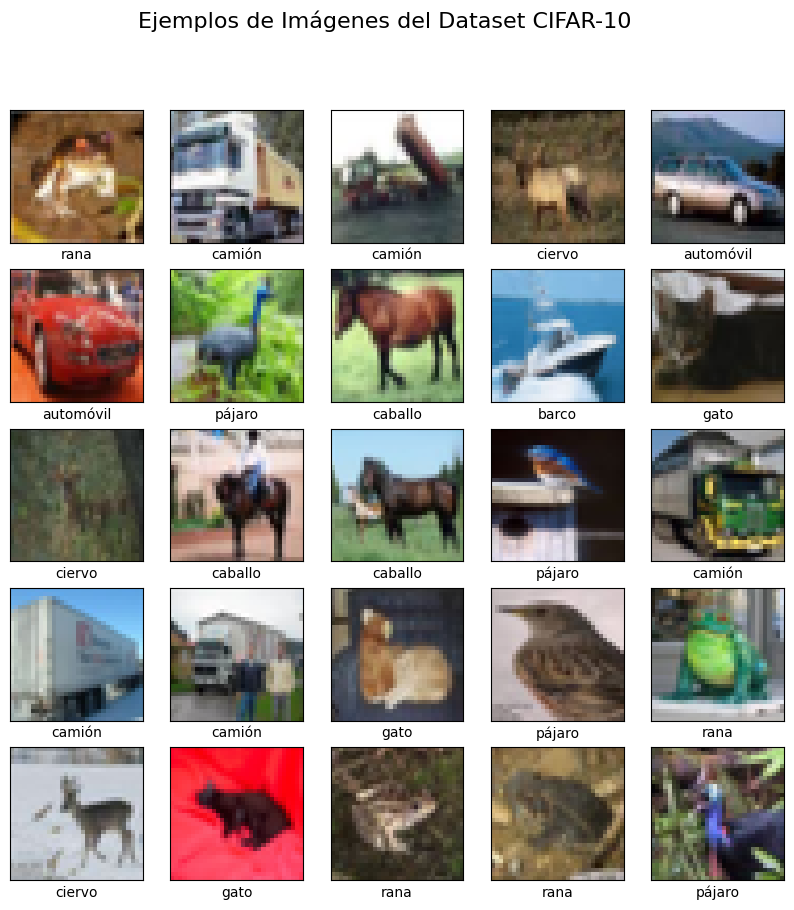

In [ ]:
# Definir nombres de las clases de CIFAR-10
class_names = ['avión', 'automóvil', 'pájaro', 'gato',
               'ciervo', 'perro', 'rana', 'caballo', 'barco', 'camión']

# Mostrar las primeras 25 imágenes del conjunto de entrenamiento
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # CIFAR-10 ya está en color RGB, no se usa cmap
    plt.imshow(train_images[i])
    # Mostrar el nombre de la clase debajo de cada imagen
    plt.xlabel(class_names[int(train_labels[i])])
plt.suptitle('Ejemplos de Imágenes del Dataset CIFAR-10', fontsize=16)
plt.show()

Paso 4: Construir la Arquitectura de la CNN

Nuestra CNN para CIFAR-10 tendrá la siguiente estructura:

Capas Convolucionales (Conv2D):

Extraen características de la imagen usando filtros de 3x3.

La primera capa aplica 32 filtros; las siguientes capas aplican 64 filtros.

Se usa la activación ReLU para introducir no-linealidad.

Capas de Agrupación (MaxPooling2D):

Reducen la dimensión de las imágenes, conservando las características más importantes.

Ayudan a que la red sea más eficiente y menos sensible a la posición de los objetos.

Aplanar (Flatten):

Convierte el mapa 2D de características en un vector 1D para poder conectarlo a las capas densas.

Capas Densas (Dense):

Capa oculta con 64 neuronas y activación ReLU.

Capa de salida con 10 neuronas (una por cada clase de CIFAR-10) y activación softmax, que da la probabilidad de cada clase.

In [ ]:
model = models.Sequential()

# Bloque Convolucional 1
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Bloque Convolucional 2
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Bloque Convolucional 3
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Bloque de Clasificación
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))   # Capa oculta
model.add(layers.Dense(10, activation='softmax')) # Capa de salida (10 clases)

# Mostrar resumen del modelo
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

Paso 5: Compilar y Entrenar el Modelo

Antes de entrenar, debemos compilar el modelo indicando:

Optimizador (optimizer): adam, que ajusta los pesos de la red de manera eficiente.

Función de pérdida (loss): sparse_categorical_crossentropy, ideal para múltiples clases (10 en CIFAR-10) con etiquetas numéricas.

Métricas (metrics): accuracy, para medir la precisión del modelo durante el entrenamiento.

Luego, entrenamos el modelo usando los datos de entrenamiento y validación:

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_images, train_labels,
    epochs=10,
    validation_data=(test_images, test_labels)
)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 50ms/step - accuracy: 0.3499 - loss: 1.7632 - val_accuracy: 0.5028 - val_loss: 1.3967
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 47ms/step - accuracy: 0.5629 - loss: 1.2319 - val_accuracy: 0.5990 - val_loss: 1.1128
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 47ms/step - accuracy: 0.6282 - loss: 1.0621 - val_accuracy: 0.6314 - val_loss: 1.0547
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 47ms/step - accuracy: 0.6743 - loss: 0.9341 - val_accuracy: 0.6613 - val_loss: 0.9784
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 48ms/step - accuracy: 0.7046 - loss: 0.8424 - val_accuracy: 0.6738 - val_loss: 0.9407
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 47ms/step - accuracy: 0.7273 - loss: 0.7867 - val_accuracy: 0.7046 - val_loss: 0.8533
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 49ms/step - accuracy: 0.7469 - loss: 0.7320 - val_accuracy: 0.7022 - val_loss: 0.8697
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 47ms/step - accuracy: 0.7592 -

Paso 6: Evaluar los Resultados

Después del entrenamiento, evaluamos la precisión final del modelo usando el conjunto de prueba (test_images).
Además, podemos visualizar cómo la precisión del entrenamiento y de la validación mejoró a lo largo de las épocas:

313/313 - 4s - 12ms/step - accuracy: 0.7005 - loss: 0.8971

Precisión (Accuracy) en los datos de prueba: 70.05%


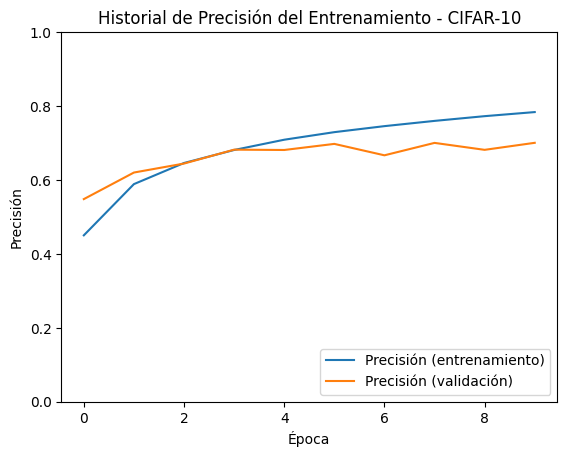

In [ ]:
# Evaluar precisión final con los datos de prueba
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nPrecisión (Accuracy) en los datos de prueba: {test_acc * 100:.2f}%")

# Graficar la precisión durante el entrenamiento
plt.plot(history.history['accuracy'], label='Precisión (entrenamiento)')
plt.plot(history.history['val_accuracy'], label='Precisión (validación)')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.ylim([0, 1])  # Mostrar todo el rango de precisión
plt.legend(loc='lower right')
plt.title('Historial de Precisión del Entrenamiento - CIFAR-10')
plt.show()

Paso 7: Matriz de Confusión

La matriz de confusión nos permite ver en detalle qué tan bien nuestro modelo clasifica cada una de las 10 clases de CIFAR-10.
Cada fila representa las clases verdaderas y cada columna las predicciones. Así podemos identificar fácilmente en qué clases se confunde el modelo.

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


Text(0.5, 1.0, 'Matriz de Confusión - CIFAR-10')

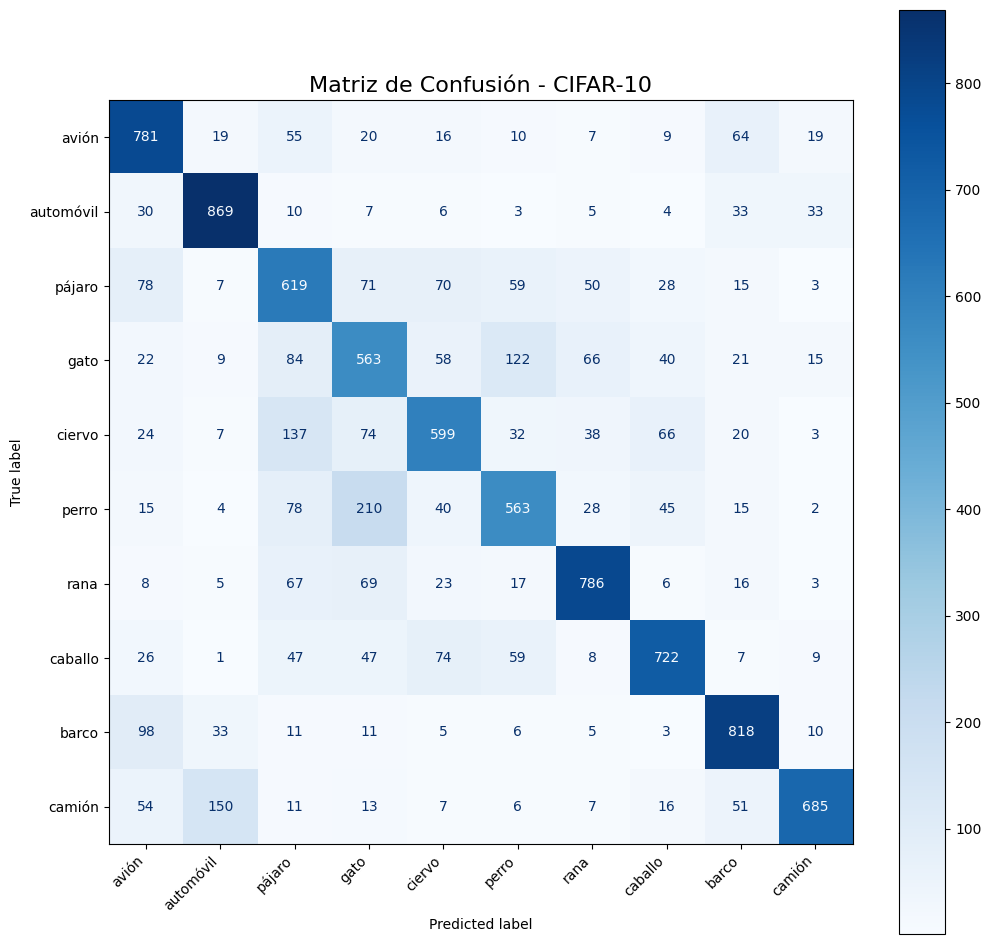

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predecir clases para los datos de prueba
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_labels.flatten()  # Aplanar etiquetas a 1D

# Nombres de las clases CIFAR-10
class_names = ['avión', 'automóvil', 'pájaro', 'gato',
               'ciervo', 'perro', 'rana', 'caballo', 'barco', 'camión']

# Crear matriz de confusión
cm = confusion_matrix(y_true, y_pred_classes)

# Mostrar la matriz de confusión con etiquetas legibles
plt.figure(figsize=(12,12))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, values_format='d', ax=plt.gca())
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x
plt.yticks(rotation=0)                # Etiquetas del eje y horizontales
plt.title('Matriz de Confusión - CIFAR-10', fontsize=16)

Conclusión
Nuestra CNN logró buena precisión en CIFAR-10, demostrando que las capas Conv2D y MaxPooling2D extraen características importantes. Esto permite al modelo clasificar correctamente objetos como avión, automóvil, pájaro, gato o barco, que se muestran en las imágenes de entrenamiento.